<a href="https://colab.research.google.com/github/nchaudhary1/LogisticRegresion_project/blob/main/BK41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/portu_banking_final.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
data.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [ ]:
data['age'] = data['age'].replace(['35-30'],33)
data['age'] = data['age'].replace(['30-35'],33)
data['age'] = data['age'].replace(['25-30'],27)
data['age'] = data['age'].replace(['30-32'],31)
data['age'] = data['age'].replace(['18-25'],22)
data['age'] = data['age'].replace(['50-55'],53)
data['age'] = data['age'].replace(['45-50'],48)
data['age'] = data['age'].replace(['20-25'],23)
data['age'] = data['age'].replace(['20-40'],30)
data['age'] = data['age'].replace(['35-40'],38)
data['age'] = data['age'].replace(['30-40'],35)

In [ ]:
data['age'] = pd.to_numeric(data['age'])

In [ ]:
data.job.value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
HOUSEMAID            1
MANAGEMENT           1
BLUE-COLLAR          1
UNKNOWN              1
TECHNICIAN           1
Name: job, dtype: int64

In [ ]:
data['job'] = data['job'].replace(['SERVICES'],'services')
data['job'] = data['job'].replace(['RETIRED'], 'retired')
data['job'] = data['job'].replace(['ADMIN.'], 'admin.')
data['job'] = data['job'].replace(['STUDENT'], 'student')
data['job'] = data['job'].replace(['UNKNOWN'], 'unknown')
data['job'] = data['job'].replace(['BLUE-COLLAR'],'blue-collar')
data['job'] = data['job'].replace(['HOUSEMAID'],'housemaid')
data['job'] = data['job'].replace(['MANAGEMENT'], 'management')
data['job'] = data['job'].replace(['TECHNICIAN'], 'technician')

In [ ]:
data.marital.value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [ ]:
data['marital'] = data['marital'].replace(['M'],'married')
data['marital'] = data['marital'].replace(['D'], 'divorced')
data['marital'] = data['marital'].replace(['S'], 'single')

In [ ]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [ ]:
data['education'] = data['education'].replace({'basic-4y':'basic.4y','basic-9y':'basic.9y','basic-6y':'basic.6y'})

In [ ]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [ ]:
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
data.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
data.duration.value_counts()

85      170
90      170
136     168
73      167
124     164
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

In [ ]:
data.campaign.value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [ ]:
data.pdays.value_counts()

999.0     39668
3.0         439
6.0         412
4.0         118
9.0          64
2.0          61
7.0          60
12.0         58
10.0         52
5.0          46
13.0         36
11.0         28
1.0          26
15.0         24
14.0         20
8.0          18
0.0          15
16.0         11
17.0          8
18.0          7
9999.0        5
19.0          3
22.0          3
21.0          2
20.0          1
26.0          1
27.0          1
25.0          1
Name: pdays, dtype: int64

In [ ]:
data.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [ ]:
data.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
data.emp_var_rate.value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64

In [ ]:
data.cons_price_idx.value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons_price_idx, dtype: int64

In [ ]:
data.cons_conf_idx.value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons_conf_idx, dtype: int64

In [ ]:
data.euribor3m.value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.329       1
0.933       1
0.996       1
1.574       1
3.282       1
Name: euribor3m, Length: 316, dtype: int64

In [ ]:
data.nr_employed.value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr_employed, dtype: int64

In [ ]:
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910802,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187008,254.312128,2.623489,956.046344,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555327,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.360465,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.947924,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926682,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [ ]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899176,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.306924,257.438623,2.57281,967.969753,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158109,261.524378,2.53380,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [ ]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.447644,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.062035,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079916,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.877959,253.223373,2.563527,953.286982,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


Text(0, 0.5, 'frequency of purchase')

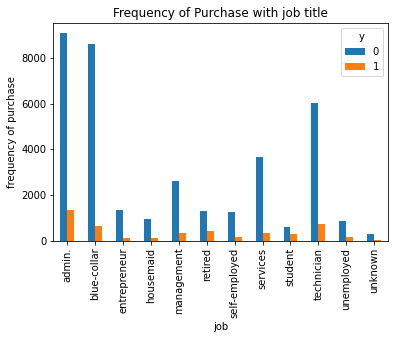

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Frequency of Purchase with job title')
plt.xlabel('job')
plt.ylabel('frequency of purchase')

Text(0, 0.5, 'frequency of purchase')

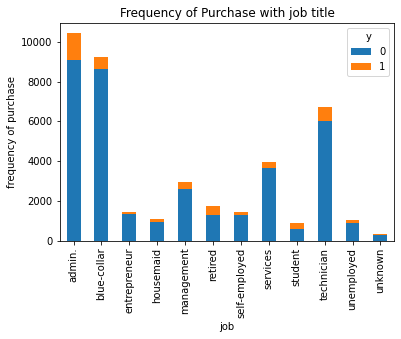

In [ ]:
pd.crosstab(data.job,data.y).plot(kind='bar',stacked = True)
plt.title('Frequency of Purchase with job title')
plt.xlabel('job')
plt.ylabel('frequency of purchase')

Text(0, 0.5, 'frequency of purchase')

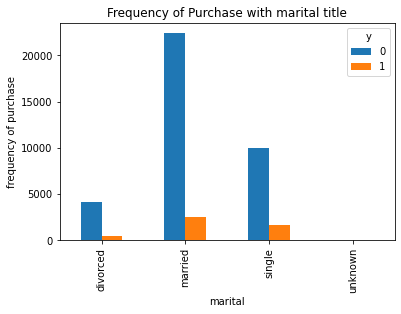

In [ ]:
pd.crosstab(data.marital,data.y).plot(kind='bar')
plt.title('Frequency of Purchase with marital title')
plt.xlabel('marital')
plt.ylabel('frequency of purchase')

Text(0, 0.5, 'frequency of purchase')

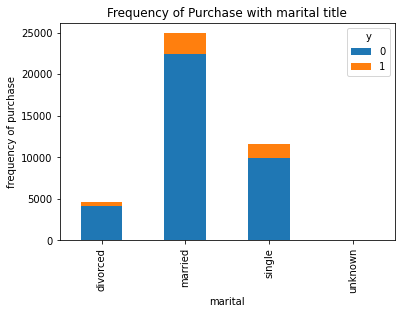

In [ ]:
pd.crosstab(data.marital,data.y).plot(kind='bar', stacked = True)
plt.title('Frequency of Purchase with marital title')
plt.xlabel('marital')
plt.ylabel('frequency of purchase')

Text(0, 0.5, 'frequency of purchase')

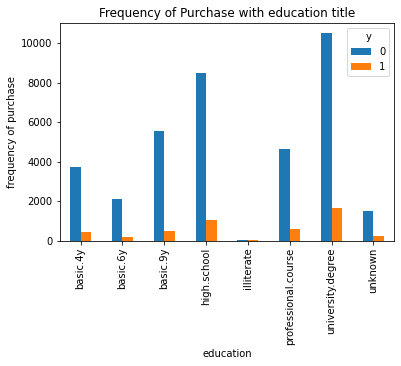

In [ ]:
pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Frequency of Purchase with education title')
plt.xlabel('education')
plt.ylabel('frequency of purchase')

Text(0, 0.5, 'frequency of purchase')

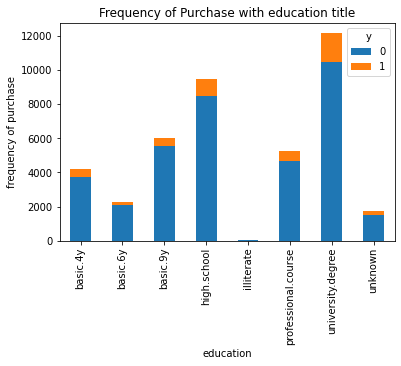

In [ ]:
pd.crosstab(data.education,data.y).plot(kind='bar', stacked = True)
plt.title('Frequency of Purchase with education title')
plt.xlabel('education')
plt.ylabel('frequency of purchase')

Text(0, 0.5, 'frequency of purchase')

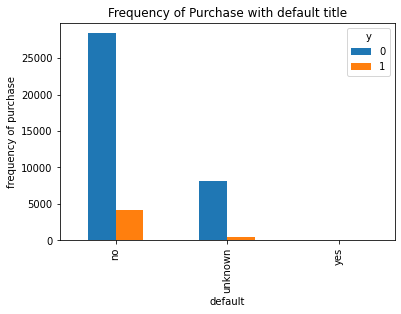

In [ ]:
pd.crosstab(data.default,data.y).plot(kind='bar')
plt.title('Frequency of Purchase with default title')
plt.xlabel('default')
plt.ylabel('frequency of purchase')

Text(0, 0.5, 'frequency of purchase')

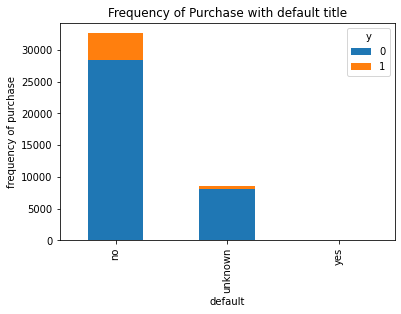

In [ ]:
pd.crosstab(data.default,data.y).plot(kind='bar', stacked = True)
plt.title('Frequency of Purchase with default title')
plt.xlabel('default')
plt.ylabel('frequency of purchase')

Text(0, 0.5, 'frequency of purchase')

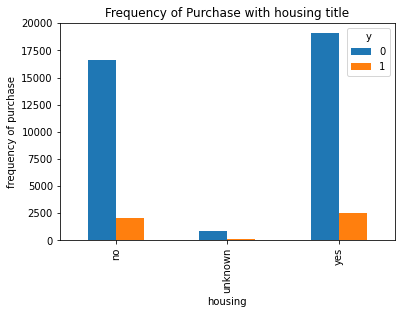

In [ ]:
pd.crosstab(data.housing,data.y).plot(kind='bar')
plt.title('Frequency of Purchase with housing title')
plt.xlabel('housing')
plt.ylabel('frequency of purchase')

Text(0, 0.5, 'frequency of purchase')

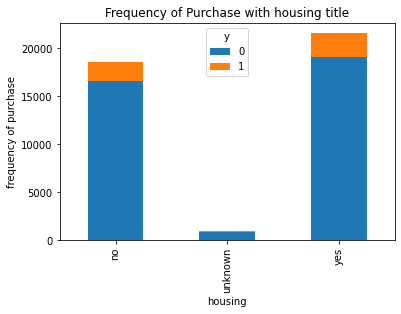

In [ ]:
pd.crosstab(data.housing,data.y).plot(kind='bar', stacked = True)
plt.title('Frequency of Purchase with housing title')
plt.xlabel('housing')
plt.ylabel('frequency of purchase')

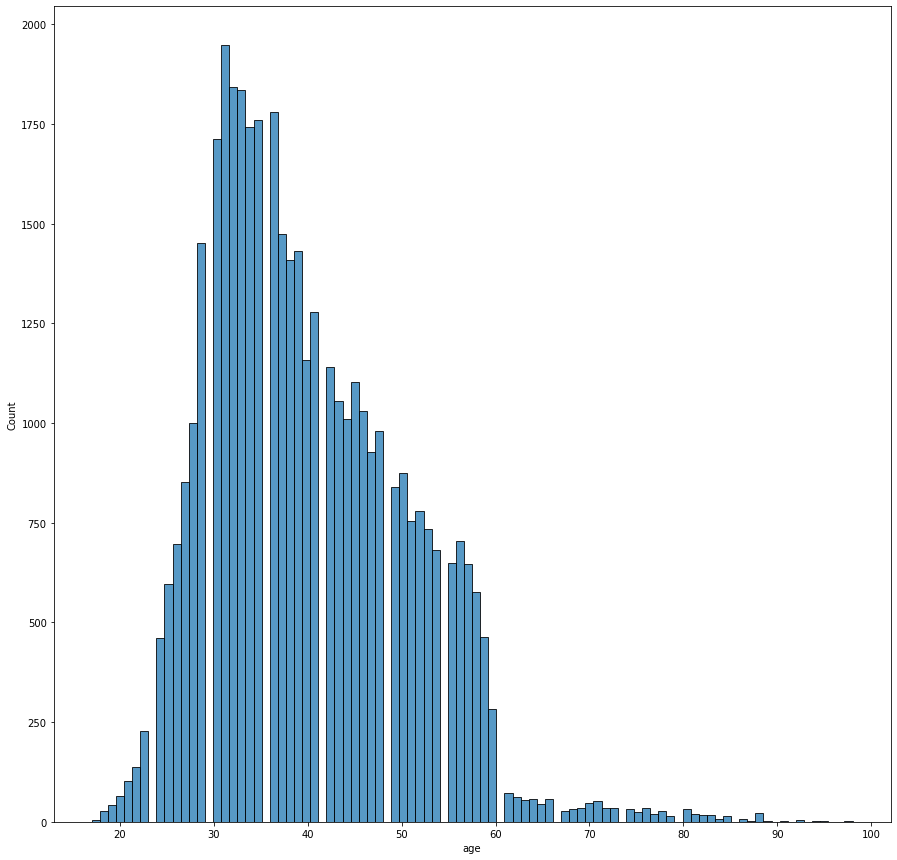

In [ ]:
plt.figure(figsize=(15,15))
sns.histplot(data['age'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.loc[:,['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']] = \
data.loc[:,['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']].apply(enc.fit_transform)

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,210,1,999.0,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,138,1,999.0,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,339,3,6.0,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,185,2,999.0,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,137,1,3.0,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
corr = data.corr()
corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,0.001268,-0.389762,-0.117929,0.164969,-0.001577,-0.007360,0.007036,-0.024842,-0.017535,-0.000880,0.004596,-0.032925,0.024376,0.019744,-0.000400,0.000838,0.129345,0.010743,-0.017748,0.030410
job,0.001268,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006490,-0.006923,-0.029323,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389762,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,0.010290,-0.007240,-0.029868,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117929,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,-0.015102,0.000371,-0.041991,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164969,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,-0.011794,0.032825,0.070550,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001577,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.007658,-0.011010,-0.011782,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007360,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.000916,0.005166,0.002248,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007036,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.026657,0.077368,0.102350,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024842,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,0.003690,-0.062059,-0.047230,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017535,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.021950,-0.038288,-0.009167,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


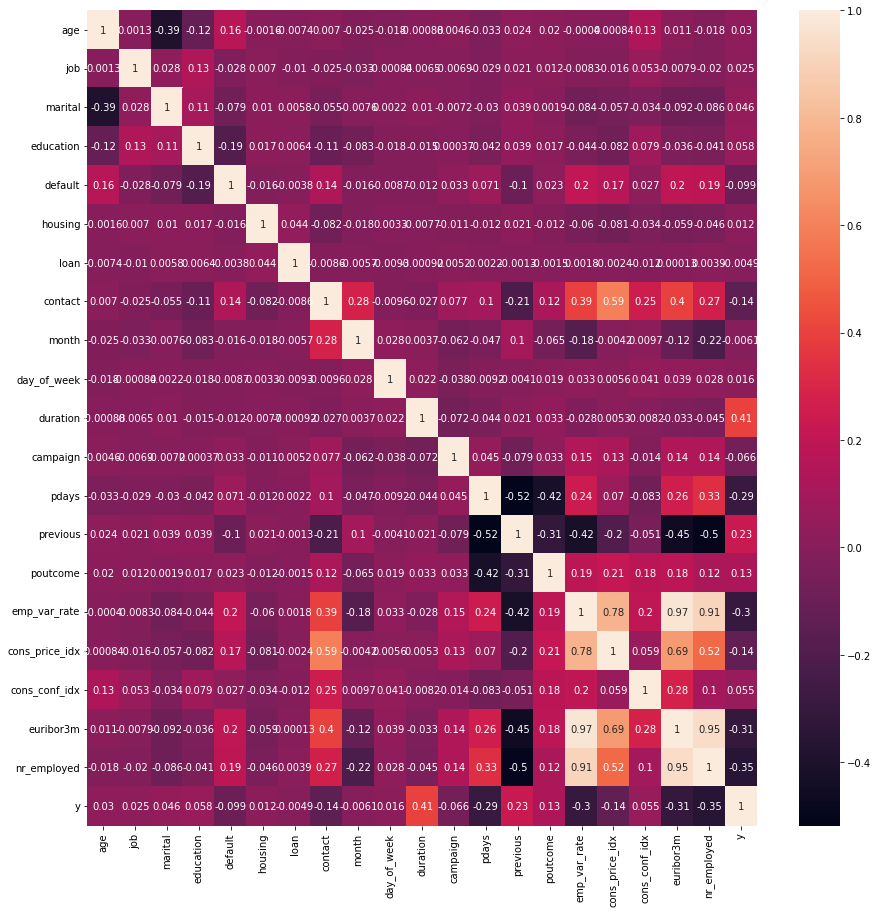

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True)

In [ ]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]


In [ ]:
print(X.shape)
Y.shape

(41188, 20)


(41188,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .20)
model = LogisticRegression(verbose = 1)
model.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(verbose=1)

In [ ]:
predictions = model.predict(X_test)
predictions

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7310
           1       0.65      0.37      0.47       928

    accuracy                           0.91      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.89      0.91      0.90      8238



In [ ]:
print(accuracy_score(Y_test, predictions))

0.907016266084001


In [ ]:
cm = confusion_matrix(Y_test, predictions)
cm

array([[7127,  183],
       [ 583,  345]])

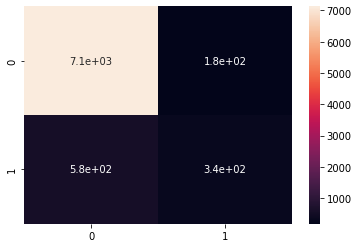

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
pd.crosstab(Y_test, predictions)

col_0,0,1
y,,
0,7127,183
1,583,345


In [ ]:

import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_sm, Y_sm = sm.fit_resample(X, Y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (41188, 20)
Shape of X after SMOTE: (73096, 20)


In [ ]:
model = LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X_sm,Y_sm,test_size=0.20, random_state=2)
model.fit(X_train, Y_train)
preds=model.predict(X_test)

In [ ]:
cm1 = confusion_matrix(Y_test, preds)

In [ ]:
cm1

array([[6206, 1138],
       [ 895, 6381]])

In [ ]:
pd.crosstab(Y_test, preds)

col_0,0,1
y,,
0,6206,1138
1,895,6381


In [ ]:
print(accuracy_score(Y_test, preds))

0.8609439124487004


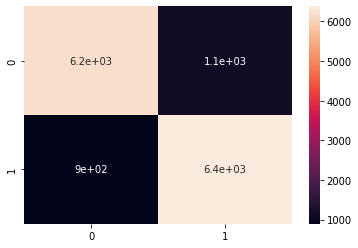

In [ ]:
sns.heatmap(cm1, annot = True)

In [ ]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(model, n_features_to_select= None)
rfe = rfe.fit(X_train, Y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True  True  True False  True False  True
 False  True  True False False False  True False]
[11  8  1  5  1  1  1  1  6  1  7  1 10  1  1  3  2  4  1  9]


In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression RFE (Lasso),0.860944,0.84865,0.876993,0.862589
